#### ASSIGNMENT 3---OPEN DATA PROJECT

## Title: Is there any connection between movie's IMDB score and its profit,facebook_likes and genres?

#### YUNCONG LIU/Z5111185

In [1]:
import numpy as np
import pandas
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# Will allow us to embed images in the notebook
%matplotlib inline

In [2]:
# load the specified csv file into a dataframe
df = pandas.read_csv('movie_metadata.csv', sep=',', skipinitialspace=True)
# print some basic information
print('The dimension of the dataframe is: <rows: {}> X <columns: {}>'.format(*df.shape))
print('------------------------------------------------')
print('All column headers:\n{}'.format(tuple(df.columns.values)))
print('------------------------------------------------')
print('The descriptive stats for all columns:')
df.describe()

The dimension of the dataframe is: <rows: 5043> X <columns: 28>
------------------------------------------------
All column headers:
('color', 'director_name', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language', 'country', 'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes')
------------------------------------------------
The descriptive stats for all columns:


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [3]:
print('Check a little bit about types of all columns:')
df.dtypes

Check a little bit about types of all columns:


color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [4]:
print('The first 5 rows:')
df.head()

The first 5 rows:


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [5]:
print('The last 5 rows:')
df.tail()

The last 5 rows:


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
5042,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


In [6]:
print('The rows with null value(s):')
# print(df[df.isnull().any(axis=1)])
df = df.dropna(how='any');

The rows with null value(s):


### Let's have a look on the year of movies.

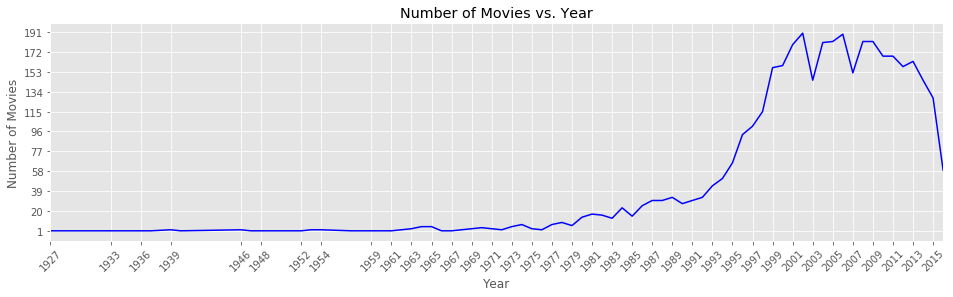

In [7]:
series = df['title_year'].dropna().astype(int)

data = series.value_counts().sort_index()

ax = data.plot(
    title='Number of Movies vs. Year',
    xticks=data.index[::2],
    yticks=np.arange(data.min(), data.max() + 10, 19),
    c='blue', grid=True, figsize=(16,4), rot=45)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Movies');

### As you can find, the number of movies increased dramatically since 1993

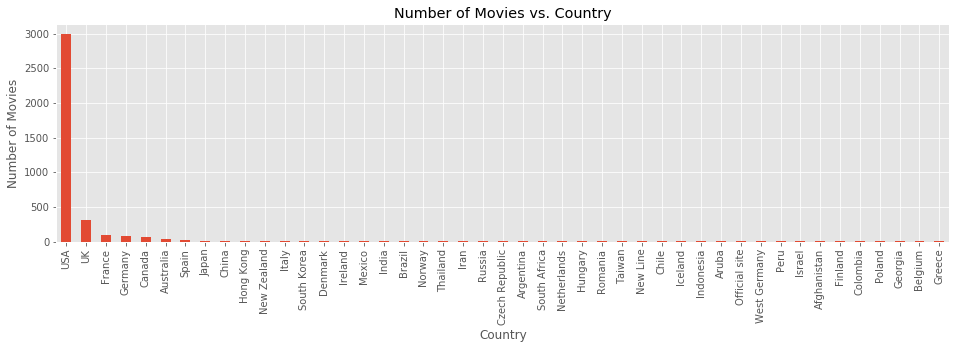

In [9]:
data = df['country'].value_counts()
ax = data.plot.bar(
    title='Number of Movies vs. Country',
    grid=True, figsize=(16,4));
ax.set_xlabel('Country')
ax.set_ylabel('Number of Movies');

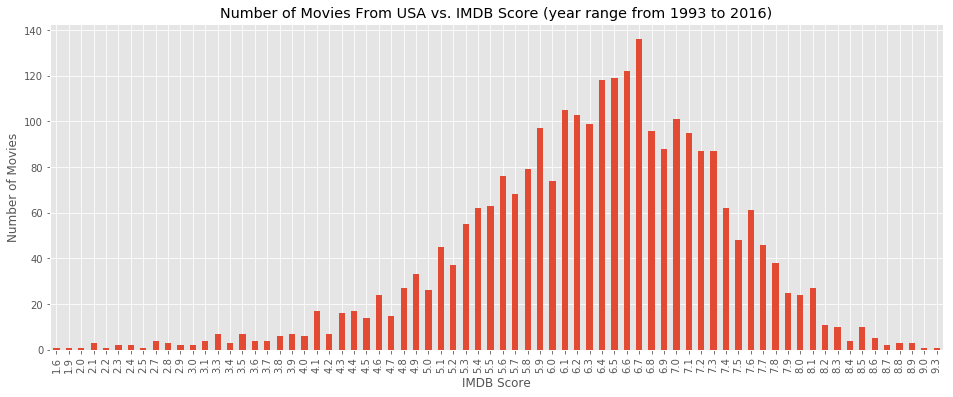

In [8]:
df_new = df[(df['country'] == 'USA') & (df['title_year'] >= 1993) & (df['title_year'] <= 2016)]
df1 = df_new[['imdb_score', 'movie_title']]
df2 = df1.groupby('imdb_score').count()
ax = df2.plot.bar(
    title='Number of Movies From USA vs. IMDB Score (year range from 1993 to 2016)',
    legend=None, grid=True, figsize=(16,6))
ax.set_xlabel('IMDB Score')
ax.set_ylabel('Number of Movies');

In [10]:
# top_movies = df1.nlargest(20, 'imdb_score')
df1 = df1.sort_values('imdb_score', ascending=False)
top_movies = df1[:20]
bot_movies = df1[-20:]
print('The Top 20 USA Movies w/ highest IMDB score:')
print(top_movies.to_string(index=False))
print('------------------------------------------------')
print('The Bot 20 USA Movies w/ highest IMDB score:')
print(bot_movies.to_string(index=False))

The Top 20 USA Movies w/ highest IMDB score:
imdb_score                                     movie_title
       9.3                       The Shawshank Redemption 
       9.0                                The Dark Knight 
       8.9  The Lord of the Rings: The Return of the King 
       8.9                                   Pulp Fiction 
       8.9                               Schindler's List 
       8.8                                     Fight Club 
       8.8                                      Inception 
       8.8                                   Forrest Gump 
       8.7          The Lord of the Rings: The Two Towers 
       8.7                                     The Matrix 
       8.6                            Saving Private Ryan 
       8.6                             American History X 
       8.6                                          Se7en 
       8.6                             The Usual Suspects 
       8.6                                   Interstellar 
       8.5 

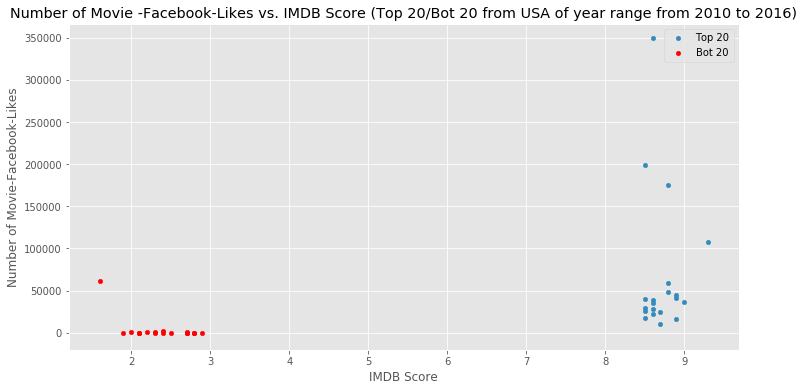

In [11]:
df_top = df_new.ix[top_movies.index]
df_bot = df_new.ix[bot_movies.index]
df1 = df_top[['imdb_score', 'movie_facebook_likes']]
df2 = df_bot[['imdb_score', 'movie_facebook_likes']]
ax = df1.plot.scatter(label='Top 20',
    x='imdb_score', y='movie_facebook_likes',
    title='Number of Movie -Facebook-Likes vs. IMDB Score (Top 20/Bot 20 from USA of year range from 2010 to 2016)',
    s=20, grid=True, figsize=(12,6))
df2.plot.scatter(ax=ax, label='Bot 20',
    x='imdb_score', y='movie_facebook_likes',
    s=20, c='r')
ax.set_xlabel('IMDB Score')
ax.set_ylabel('Number of Movie-Facebook-Likes');

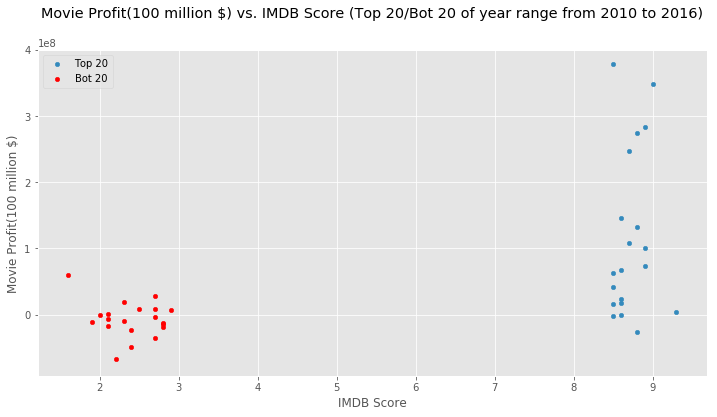

In [12]:
df1 = df_top[['imdb_score', 'gross', 'budget']]
df2 = df_bot[['imdb_score', 'gross', 'budget']]
df1 = df1.assign(profit=(df1['gross'] - df1['budget']))
df2 = df2.assign(profit=(df2['gross'] - df2['budget']))
ax = df1.plot.scatter(label='Top 20',
    x='imdb_score', y='profit',
    s=20, grid=True, figsize=(12,6))
df2.plot.scatter(ax=ax, label='Bot 20',
    x='imdb_score', y='profit',
    s=20, c='r')
ax.set_xlabel('IMDB Score')
ax.set_ylabel('Movie Profit(100 million $)');
ax.set_title('Movie Profit(100 million $) vs. IMDB Score (Top 20/Bot 20 of year range from 2010 to 2016)', y=1.08);

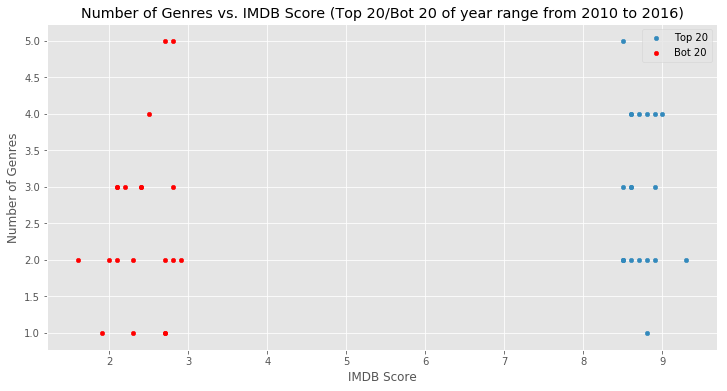

In [13]:
df1 = df_top[['imdb_score', 'genres']]
df2 = df_bot[['imdb_score', 'genres']]
df1 = df1.assign(ngenres=(df1['genres'].str.split('|').apply(len)))
df2 = df2.assign(ngenres=(df2['genres'].str.split('|').apply(len)))
ax = df1.plot.scatter(label='Top 20',
    x='imdb_score', y='ngenres',
    title='Number of Genres vs. IMDB Score (Top 20/Bot 20 of year range from 2010 to 2016)',
    s=20, grid=True, figsize=(12,6))
ax = df2.plot.scatter(ax=ax, label='Bot 20',
    x='imdb_score', y='ngenres',
    s=20, c='r')
ax.set_xlabel('IMDB Score')
ax.set_ylabel('Number of Genres');

Thank you